# Exercise 2.4 – Fundamentals of Visualization Libraries (Part 2)

**Author:** Brahim Boukaskas  
**Program:** CareerFoundry – Data Analytics  
**Project:** New York CitiBike 2022  

### Objective
In this exercise, I explored Seaborn’s visualization capabilities by applying a consistent theme and palette across multiple plot types. The analysis focuses on New York’s CitiBike data merged with daily weather information for 2022. The goal is to uncover behavioral patterns among riders and visualize how environmental factors, such as temperature, relate to ridership trends.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load merged dataset
df = pd.read_csv("../temp_storage/data_raw/citibike_weather_2022.csv")

# Choose a global theme (one style + palette)
sns.set_theme(style="darkgrid", palette="Blues_r")


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_98942/4069926704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x="value", y="start_station_name", palette="Blues_r")


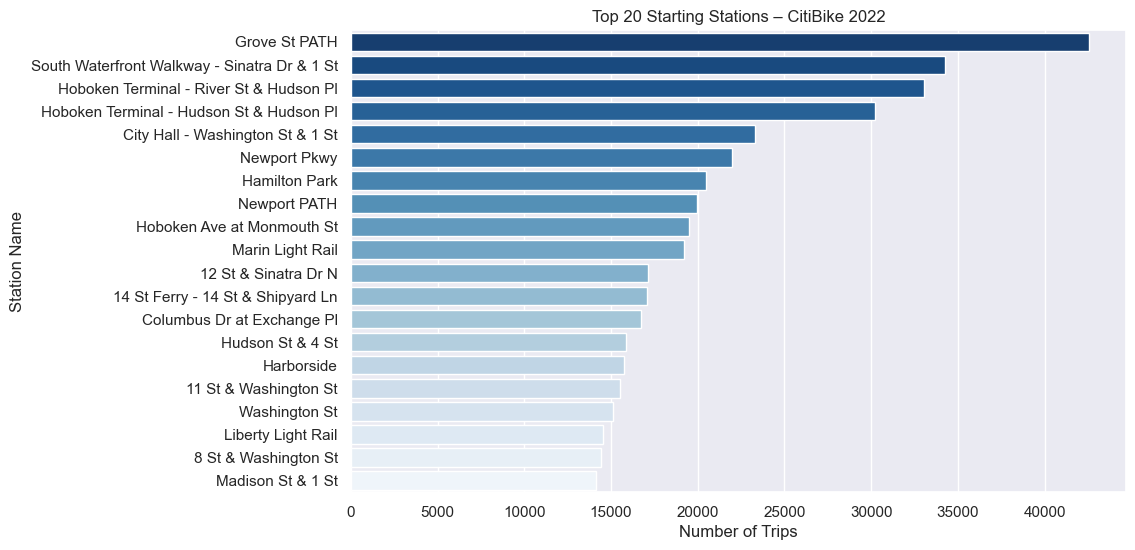

In [2]:
df["value"] = 1
top20 = df.groupby("start_station_name")["value"].count().reset_index().nlargest(20, "value")

plt.figure(figsize=(10,6))
sns.barplot(data=top20, x="value", y="start_station_name", palette="Blues_r")
plt.title("Top 20 Starting Stations – CitiBike 2022")
plt.xlabel("Number of Trips")
plt.ylabel("Station Name")
plt.show()


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_98942/2117348203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x="value", y="start_station_name", palette=sns.color_palette("Blues_r", n_colors=20))


<Axes: xlabel='value', ylabel='start_station_name'>

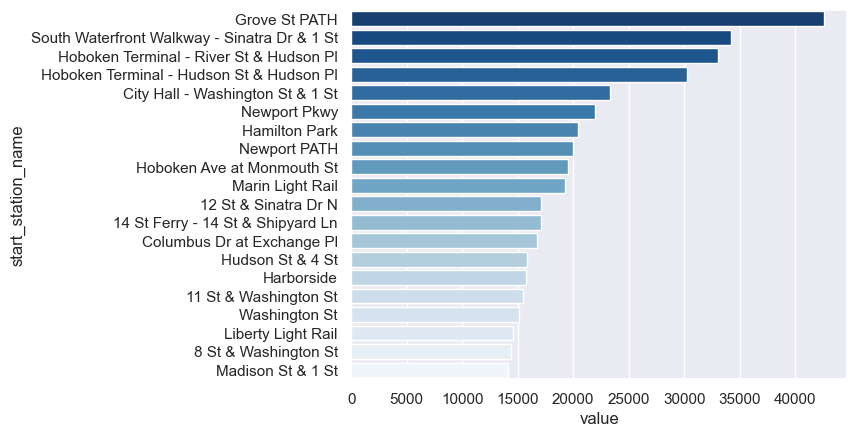

In [3]:
sns.barplot(data=top20, x="value", y="start_station_name", palette=sns.color_palette("Blues_r", n_colors=20))


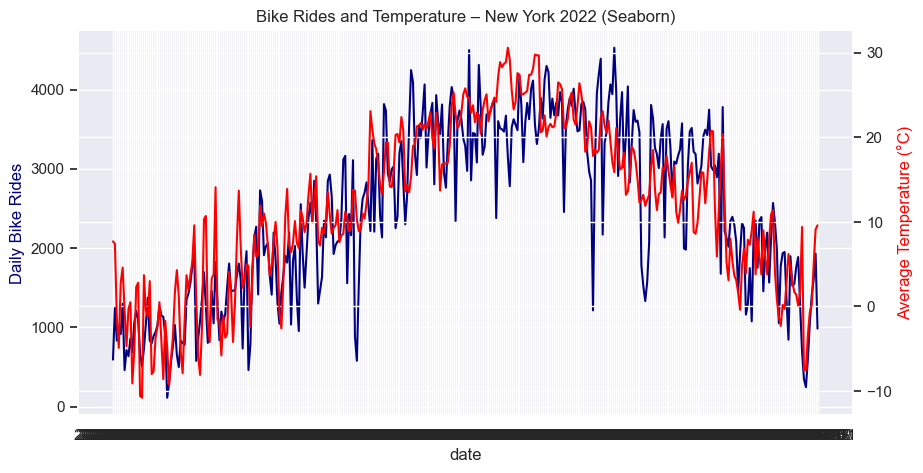

In [4]:
df_daily = df.groupby("date")[["ride_id"]].count().reset_index().rename(columns={"ride_id":"bike_rides_daily"})
df_temp = df[["date","avgTemp"]].drop_duplicates(subset="date")
df_merge = pd.merge(df_daily, df_temp, on="date", how="left")

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=df_merge, x="date", y="bike_rides_daily", color="navy", ax=ax)
ax.set_ylabel("Daily Bike Rides", color="navy")

ax2 = ax.twinx()
sns.lineplot(data=df_merge, x="date", y="avgTemp", color="red", ax=ax2)
ax2.set_ylabel("Average Temperature (°C)", color="red")

plt.title("Bike Rides and Temperature – New York 2022 (Seaborn)")
plt.show()


In [6]:
# Convert columns to datetime first
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Create a new trip duration column in minutes
df["tripduration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Check
print(df["tripduration"].describe())


count    895485.000000
mean         17.542010
std         126.700135
min         -55.516667
25%           4.516667
50%           7.200000
75%          12.250000
max       28541.500000
Name: tripduration, dtype: float64


In [7]:
# Keep only trips between 0 and 120 minutes (2 hours)
df = df[(df["tripduration"] > 0) & (df["tripduration"] < 120)]

print("Remaining rows:", len(df))
print(df["tripduration"].describe())


Remaining rows: 887612
count    887612.000000
mean         11.118891
std          12.977608
min           0.016667
25%           4.483333
50%           7.150000
75%          12.000000
max         119.950000
Name: tripduration, dtype: float64


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_98942/1330060452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="member_casual", y="tripduration", data=df, palette="Blues_r")


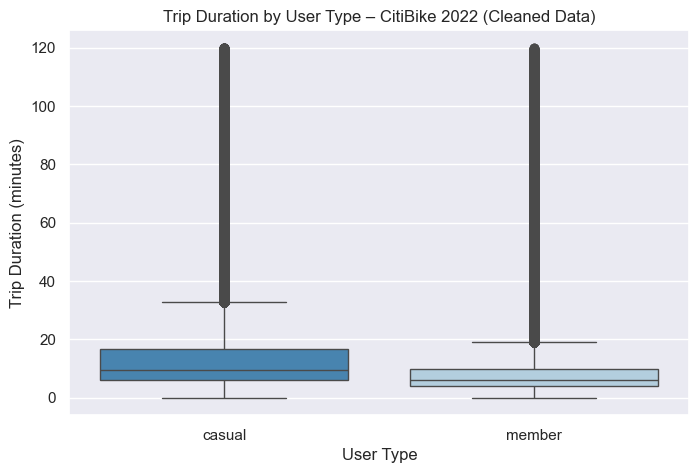

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="member_casual", y="tripduration", data=df, palette="Blues_r")
plt.title("Trip Duration by User Type – CitiBike 2022 (Cleaned Data)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()


To make the visualization more accurate, I cleaned the tripduration column by removing negative and extreme values above 120 minutes. These entries likely represent system errors or unclosed trips. The resulting box plot shows that casual users tend to have longer rides and more variability in duration, while members’ trips are shorter and more consistent, supporting the hypothesis that members use CitiBike mainly for commuting.

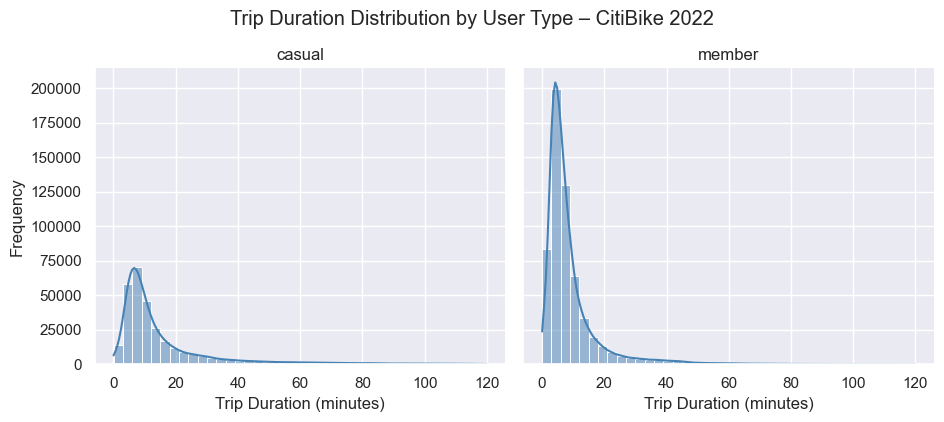

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid: one histogram per user type
grid = sns.FacetGrid(df, col="member_casual", height=4, aspect=1.2)
grid.map(sns.histplot, "tripduration", bins=40, color="steelblue", kde=True)

# Titles and layout
grid.set_axis_labels("Trip Duration (minutes)", "Frequency")
grid.set_titles(col_template="{col_name}")
plt.suptitle("Trip Duration Distribution by User Type – CitiBike 2022", y=1.05)
plt.show()


In [10]:
grid.set(xscale="log")
plt.show()


Using Seaborn’s FacetGrid, I created two histograms to compare trip duration distributions by user type.
The plots show that members mostly take short rides clustered under 20 minutes, while casual riders exhibit a wider range and more long-duration trips.
This visualization confirms behavioral differences between commuters and leisure users, and demonstrates how FacetGrid simplifies multi-facet comparisons.

### Summary and Insights

Through this exercise, I learned how to use Seaborn’s theme control, palettes, and higher-level abstractions like `FacetGrid` and `boxplot` for efficient visualization.

- The **bar chart** revealed the most frequently used starting stations across New York.
- The **dual-axis plot** confirmed that warmer days generally correspond to higher ride counts.
- The **box plot** showed that casual users take longer rides on average, with greater variability.
- The **FacetGrid** clearly separated distributions by user type, making behavioral differences easier to interpret.

Overall, Seaborn’s concise syntax and built-in aesthetics improved both the speed and quality of visualization compared to Matplotlib alone.
